# Build a Linear Regression model to predict the final exam score of students based on their study hours, attendance, and previous semester CGPA.

 ### Predict the Final Score Use features like Hours_Studied, Attendance_Rate, and Previous_Sem_CGPA to predict Final_Score using Linear Regression.

In [16]:
import pandas as pd
df=pd.read_csv('student_dataset.csv')

print(df.head())

   Student_ID  Age  Gender  Hours_Studied  Attendance_Rate  Previous_Sem_CGPA  \
0           1   24  Female            3.6             55.1               7.58   
1           2   21  Female            6.2             83.2               6.61   
2           3   22    Male            2.2             50.3               8.98   
3           4   24  Female            1.1             58.0               6.35   
4           5   20    Male            2.7             77.4               7.19   

   Family_Income Part_Time_Job  Final_Score  
0          67280           Yes         94.2  
1          99459            No         88.5  
2          36779            No         96.7  
3          83932            No         82.2  
4          92936            No         74.9  


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         100 non-null    int64  
 1   Age                100 non-null    int64  
 2   Gender             100 non-null    object 
 3   Hours_Studied      100 non-null    float64
 4   Attendance_Rate    100 non-null    float64
 5   Previous_Sem_CGPA  100 non-null    float64
 6   Family_Income      100 non-null    int64  
 7   Part_Time_Job      100 non-null    object 
 8   Final_Score        100 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 7.2+ KB


In [18]:
df.describe()

,Student_ID,Age,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Final_Score
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,21.210000,4.214000,76.41500,7.459900,81902.370000,67.907000
std,29.011492,1.913773,2.224293,14.43588,1.477141,35735.329886,19.655468
min,1.000000,18.000000,0.600000,50.30000,5.070000,21062.000000,35.900000
25%,25.750000,19.750000,2.300000,64.60000,6.247500,48019.250000,49.625000
50%,50.500000,21.000000,4.300000,78.10000,7.490000,81888.500000,67.000000
75%,75.250000,23.000000,6.225000,87.60000,8.750000,109449.250000,86.350000
max,100.000000,24.000000,7.900000,99.50000,9.950000,146174.000000,100.000000


In [19]:
df.isnull().sum()

Student_ID           0
Age                  0
Gender               0
Hours_Studied        0
Attendance_Rate      0
Previous_Sem_CGPA    0
Family_Income        0
Part_Time_Job        0
Final_Score          0
dtype: int64

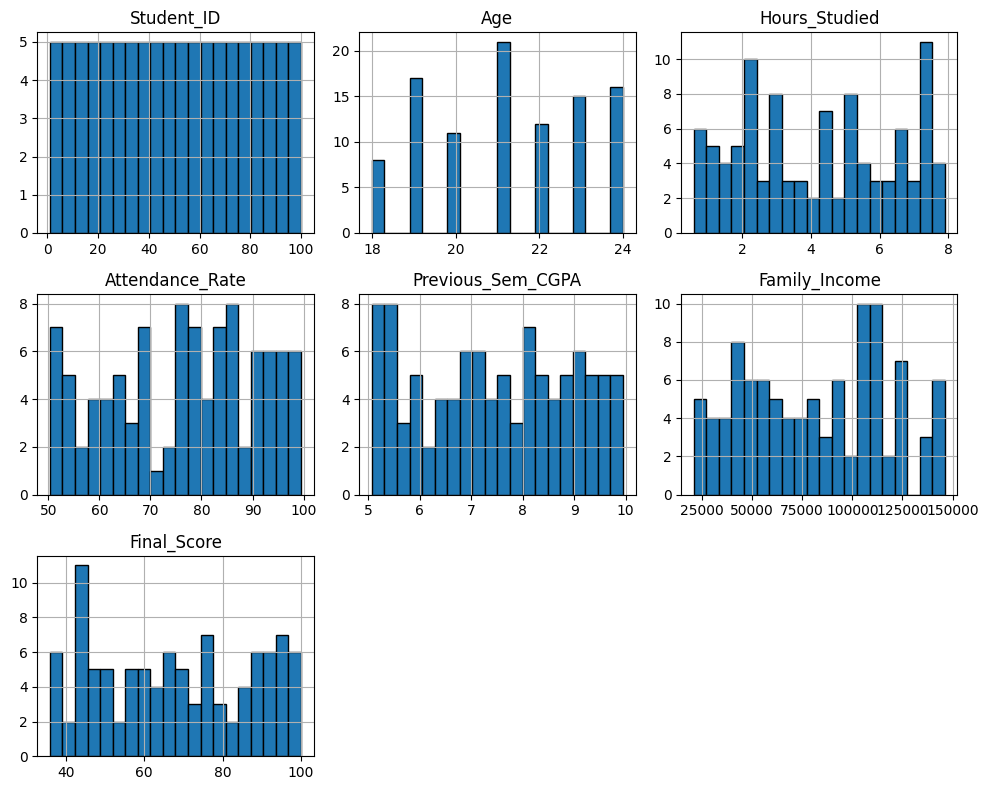

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [26]:
# Drop 'Student_ID' if it doesn't add value
df.drop('Student_ID', axis=1, inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])           # Female = 0, Male = 1
df['Part_Time_Job'] = label_encoder.fit_transform(df['Part_Time_Job'])  # No = 0, Yes = 1

# Define features and target
X = df.drop('Final_Score', axis=1)
y = df['Final_Score']

# Optional: Scale numeric values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred)) 
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: -0.37532149592256236
RMSE: 22.582798586266016
